# Graph Theory Project

by Ethan Conneely (G00393941)

## Graph isomorphism problem

> The graph isomorphism problem is the computational problem of determining whether two finite graphs are isomorphic.  
> The problem is not known to be solvable in polynomial time nor to be NP-complete, and therefore may be in the computational complexity class NP-intermediate. 

[Wikipedia](https://en.wikipedia.org/wiki/Graph_isomorphism_problem)

## Youtube

I watched this video for a visual explanation of what graph isomorphism is  
[Video](https://www.youtube.com/watch?v=EwV4Puk2coU)

# NetworkX

Below i have hard coded a 2 graphs that are Isomorphic to on another. Graphs do not need to have the same node aslong as they form the same connections they are isomorphic

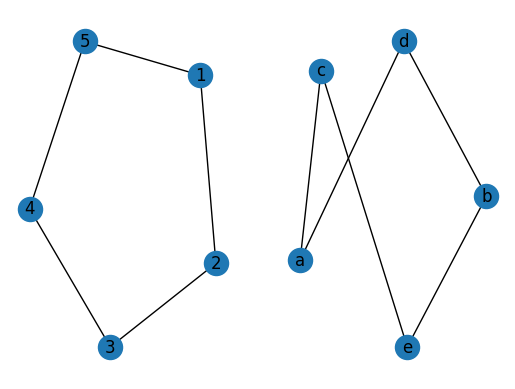

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G1 = nx.Graph()
G1.add_nodes_from([1,2,3,4,5])
G1.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,1)])

G2 = nx.Graph()
G2.add_nodes_from(["a","b","c","d","e"])
G2.add_edges_from([("a","c"),("b","d"),("c","e"),("d","a"),("e","b")])

plt.subplot(1,2,1) # Draw the first graph at index 1
nx.draw(G1,with_labels=True)

plt.subplot(1,2,2) # Draw the second graph at index 2
nx.draw(G2,with_labels=True)

plt.show()

Here i show that networkx does indeed believe them to be isomorphic.

True


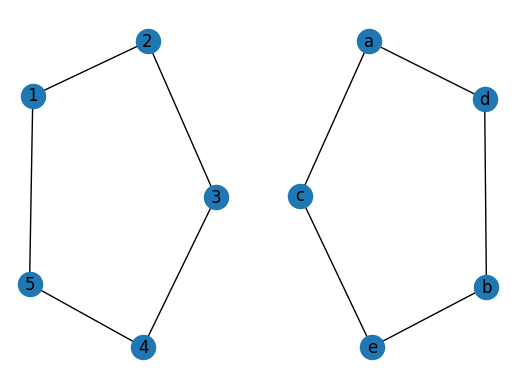

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

G1 = nx.Graph()
G1.add_nodes_from([1,2,3,4,5])
G1.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,1)])

G2 = nx.Graph()
G2.add_nodes_from(["a","b","c","d","e"])
G2.add_edges_from([("a","c"),("b","d"),("c","e"),("d","a"),("e","b")])

print(nx.is_isomorphic(G1,G2))


These 2 are ismomorphic as they both have the same number of vertices and have a bijective function that can map one to the other.

Using iter tools we can generate all the permutations of a graphs nodes easily we could use this as a way to test if 2 graphs are isomorphic.  
The only issue with that is it grows in factorial time which mean it only takes a few elements before it would take more memory and time than the total available on earth today combined.

In [19]:
import itertools as it
import numpy as np

nodes = it.permutations(np.array(["a","b","c","d","e"]))

count = 0

for node in nodes:
    print(node)
    count += 1

print("Number of permutations: "+str(count))


('a', 'b', 'c', 'd', 'e')
('a', 'b', 'c', 'e', 'd')
('a', 'b', 'd', 'c', 'e')
('a', 'b', 'd', 'e', 'c')
('a', 'b', 'e', 'c', 'd')
('a', 'b', 'e', 'd', 'c')
('a', 'c', 'b', 'd', 'e')
('a', 'c', 'b', 'e', 'd')
('a', 'c', 'd', 'b', 'e')
('a', 'c', 'd', 'e', 'b')
('a', 'c', 'e', 'b', 'd')
('a', 'c', 'e', 'd', 'b')
('a', 'd', 'b', 'c', 'e')
('a', 'd', 'b', 'e', 'c')
('a', 'd', 'c', 'b', 'e')
('a', 'd', 'c', 'e', 'b')
('a', 'd', 'e', 'b', 'c')
('a', 'd', 'e', 'c', 'b')
('a', 'e', 'b', 'c', 'd')
('a', 'e', 'b', 'd', 'c')
('a', 'e', 'c', 'b', 'd')
('a', 'e', 'c', 'd', 'b')
('a', 'e', 'd', 'b', 'c')
('a', 'e', 'd', 'c', 'b')
('b', 'a', 'c', 'd', 'e')
('b', 'a', 'c', 'e', 'd')
('b', 'a', 'd', 'c', 'e')
('b', 'a', 'd', 'e', 'c')
('b', 'a', 'e', 'c', 'd')
('b', 'a', 'e', 'd', 'c')
('b', 'c', 'a', 'd', 'e')
('b', 'c', 'a', 'e', 'd')
('b', 'c', 'd', 'a', 'e')
('b', 'c', 'd', 'e', 'a')
('b', 'c', 'e', 'a', 'd')
('b', 'c', 'e', 'd', 'a')
('b', 'd', 'a', 'c', 'e')
('b', 'd', 'a', 'e', 'c')
('b', 'd', '

Lets make a random graph with 3 nodes connected to 2 nodes
Using networkx we can call a function to check if these graphs are isomorphic and they always are

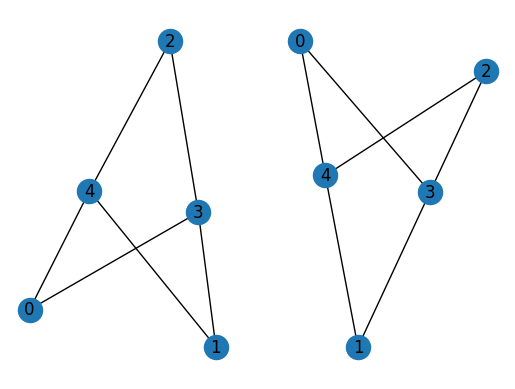

Is Graph1 isomorphic to Graph2: True


In [24]:
import random
from time import time


random.seed(time())

G1 = nx.bipartite.random_graph(3,2,1)
Graph1 = nx.Graph()
Graph1.add_nodes_from(G1.nodes())
Graph1.add_edges_from(G1.edges())

G2 = nx.bipartite.random_graph(3,2,1)
Graph2 = nx.Graph()
Graph2.add_nodes_from(G2.nodes())
Graph2.add_edges_from(G2.edges())

plt.subplot(1,2,1)
nx.draw(Graph1,with_labels=True)

plt.subplot(1,2,2)
nx.draw(Graph2,with_labels=True)
plt.show()

print("Is Graph1 isomorphic to Graph2:",nx.is_isomorphic(Graph1,Graph2))



Lets make a random graph with 3 nodes connected to 2 nodes but this time lower the change to 80 percent that a node will be connected to another node with an edge

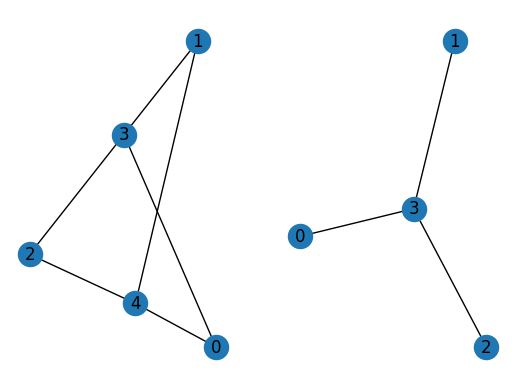

Is Graph1 isomorphic to Graph2: False


In [40]:
import random
from time import time


random.seed(time())

G1 = nx.bipartite.random_graph(3,2,1)
Graph1 = nx.Graph()
Graph1.add_nodes_from(G1.nodes())
Graph1.add_edges_from(G1.edges())

G2 = nx.bipartite.random_graph(3,1,1)
Graph2 = nx.Graph()
Graph2.add_nodes_from(G2.nodes())
Graph2.add_edges_from(G2.edges())



plt.subplot(1,2,1) # Draw the first graph at index 1
nx.draw(Graph1,with_labels=True)


plt.subplot(1,2,2) # Draw the first graph at index 1
nx.draw(Graph2,with_labels=True)
plt.show()

print("Is Graph1 isomorphic to Graph2:",nx.is_isomorphic(Graph1,Graph2))
